In [1]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
directory = os.path.dirname(os.path.dirname(os.getcwd()))

In [3]:
directory

'/data/user/boiger_r/aerosol'

# Config

In [4]:
version = '0'

In [5]:
#plot_dir = '/data/user/boiger_r/aerosol/aerosol_results/autoencoder_noise_small'+version+'/plots/hyperparameter_scans'
#plot_dir = directory +'/aerosol_results/autoencoder_noise_small'+version+'/plots/hyperparameter_scans'
plot_dir = directory + '/aerosol_results/simulated_data/autoencoder1/plots/hyperparameter_scans'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [6]:
#result_dir = '/data/user/boiger_r/aerosol/aerosol_results/autoencoder_noise_small'+version
#result_dir = directory+'/aerosol_results/autoencoder_noise_small'+version
result_dir = directory+'/aerosol_results/simulated_data/autoencoder1'

In [7]:
#model_dir = '/data/user/boiger_r/aerosol/aerosol_results/models_phase/autoencoder/autoencoder_noise_small'+version
#model_dir = directory+'/aerosol_results/models_phase/autoencoder/autoencoder_noise_small'+version
model_dir = directory+'/aerosol_results/simulated_data/autoencoder_models/autoencoder1'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)



# Load data

In [8]:
df = pd.read_csv(f'{result_dir}/results.csv', index_col=0)

In [9]:
config_columns = [col for col in df.columns if col.startswith('config/') if col.replace('config/', '') != 'datafile']
config_column_labels = {col: col.replace('config/', '') for col in config_columns if col != 'datafile'}

In [10]:
df.columns

Index(['MAE_train_dvar1', 'MAE_train_dvar2', 'MAE_train_qoi1', 'MAE_val_dvar1',
       'MAE_val_dvar2', 'MAE_val_qoi1', 'MAPE_train_dvar1', 'MAPE_train_dvar2',
       'MAPE_train_qoi1', 'MAPE_val_dvar1', 'MAPE_val_dvar2', 'MAPE_val_qoi1',
       'MSE_train_dvar1', 'MSE_train_dvar2', 'MSE_train_qoi1', 'MSE_val_dvar1',
       'MSE_val_dvar2', 'MSE_val_qoi1',
       'median_percentile_max_error_train_dvar1',
       'median_percentile_max_error_train_dvar2',
       'median_percentile_max_error_train_qoi1',
       'median_percentile_max_error_val_dvar1',
       'median_percentile_max_error_val_dvar2',
       'median_percentile_max_error_val_qoi1',
       '90_percentile_max_error_train_dvar1',
       '90_percentile_max_error_train_dvar2',
       '90_percentile_max_error_train_qoi1',
       '90_percentile_max_error_val_dvar1',
       '90_percentile_max_error_val_dvar2', '90_percentile_max_error_val_qoi1',
       'r2_train_dvar1', 'r2_train_dvar2', 'r2_train_qoi1', 'r2_val_dvar1',
       'r2_v

In [11]:
df['r2_train_dvar1'],df['r2_val_dvar1']

(0     0.998619
 1     0.999612
 2     0.996630
 3    -0.008091
 4     0.997983
         ...   
 91   -0.000385
 92   -0.000217
 93   -0.023441
 94   -0.015974
 95   -0.001850
 Name: r2_train_dvar1, Length: 96, dtype: float64,
 0     0.998637
 1     0.999611
 2     0.996651
 3    -0.008822
 4     0.997958
         ...   
 91   -0.000538
 92   -0.000206
 93   -0.023282
 94   -0.015875
 95   -0.001609
 Name: r2_val_dvar1, Length: 96, dtype: float64)

# Plot

## Generalisation of adjusted $R^2$

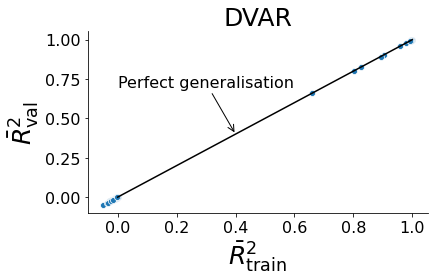

In [12]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_adj_train_dvar1', y='r2_adj_val_dvar1', ax=ax)
ax.plot([0., 1.], [0., 1.], color='black')
ax.annotate(xy=(0.4, 0.4),
            xytext=(0.0, 0.7),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_title('DVAR', fontsize = 25)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

In [13]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_adj_train_qoi1', y='r2_val_qoi1', ax=ax)
ax.plot([0., 1.], [0., 1.], color='black')
ax.annotate(xy=(0.4, 0.4),
            xytext=(0.0, 0.7),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_title('QOI', fontsize = 25)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

## Relationship between $R^2$ and rel. error

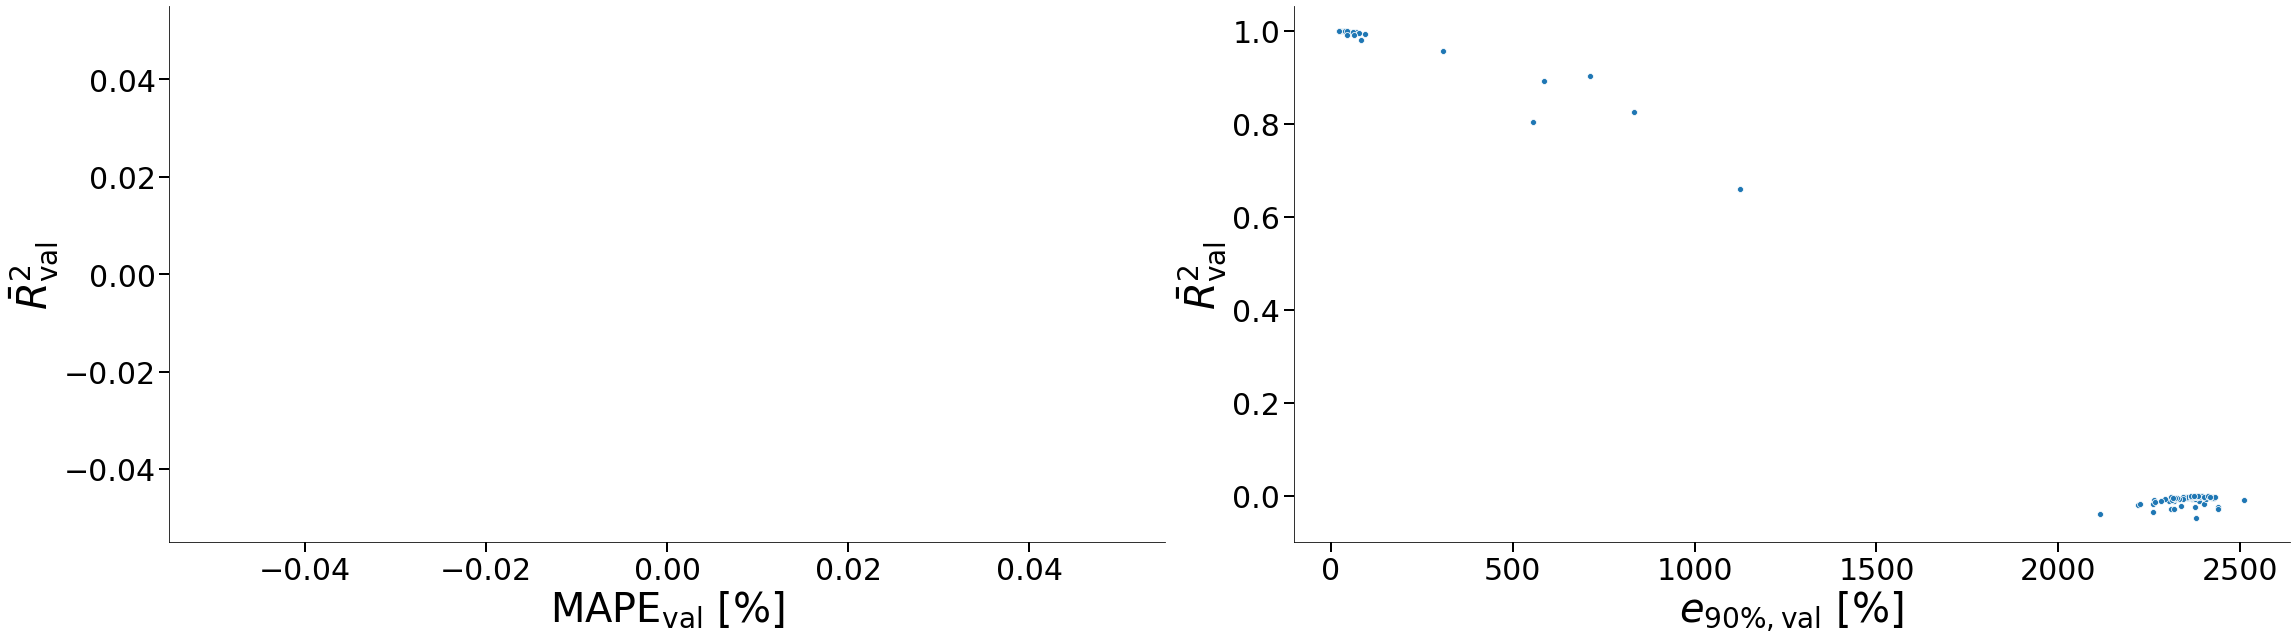

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(32, 9))

ax = axes[0]
sns.scatterplot(data=df, x='MAPE_val_dvar1', y='r2_adj_val_dvar1', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\mathrm{MAPE}_\mathrm{val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

ax = axes[1]
sns.scatterplot(data=df, x='90_percentile_max_error_val_dvar1', y='r2_val_dvar1', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$e_\mathrm{90\%, val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

for ax in axes:
    ax.tick_params(labelsize=30, width=2, length=10)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_vs_rel_errors.jpg')

## Dependence on the parameters

In [15]:
#y_lim = [0.995, 1.005]
y_lim = [0., 1.]

In [16]:
config_columns

['config/alpha',
 'config/batch_size',
 'config/epochs',
 'config/learning_rate',
 'config/n_decode_layers',
 'config/n_encode_layers']

In [17]:
to_plot = df[config_columns + ['r2_adj_val_dvar1']+['r2_adj_val_qoi1']].rename(columns=config_column_labels)

In [18]:
to_plot_ow =to_plot.copy()

In [19]:
to_plot_ow

alpha  batch_size  epochs  learning_rate  n_decode_layers  \
0       1           8     100          0.001                3   
1       1          64     100          0.001                3   
2       1         128     100          0.001                3   
3       1           8     100          0.010                3   
4       1          64     100          0.010                3   
..    ...         ...     ...            ...              ...   
91      1          64     100          0.001               20   
92      1         128     100          0.001               20   
93      1           8     100          0.010               20   
94      1          64     100          0.010               20   
95      1         128     100          0.010               20   

    n_encode_layers  r2_adj_val_dvar1  r2_adj_val_qoi1  
0                 3          0.998637         0.992882  
1                 3          0.999611         0.985065  
2                 3          0.996650         0.977013  
3                 3         -0.009137         0.984236  
4                 3          0.997957         0.985616  
..              ...               ...              ...  
91               20         -0.000851        -0.015908  
92               20         -0.000519        -0.015784  
93               20         -0.023602        -0.066067  
94               20         -0.016193        -0.014006  
95               20         -0.001922        -0.018858  

[96 rows x 8 columns]

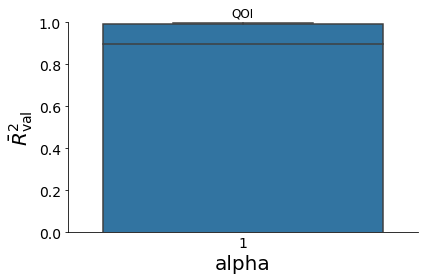

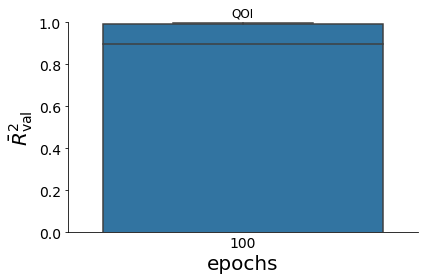

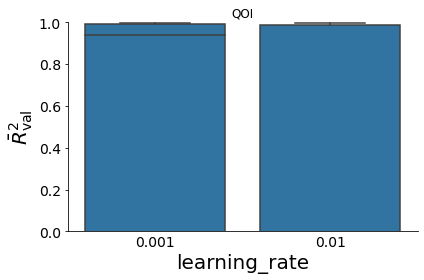

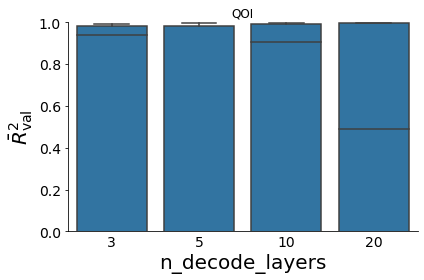

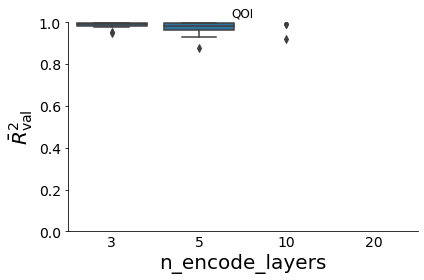

In [20]:
for param in to_plot.columns:
    if param == 'r2_adj_val_dvar1':
        continue
    if param == 'r2_adj_val_qoi1':
        continue

    fig, ax = plt.subplots()

    sns.boxplot(data=to_plot, x=param, y='r2_adj_val_qoi1', color=sns.color_palette()[0])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(y_lim)
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)
    #ax.grid(True, axis='y')
    ax.set_title('QOI')
    fig.tight_layout()
    fig.savefig(f'{plot_dir}/dependence_on_{param}.jpg')

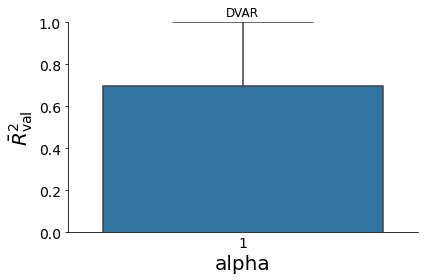

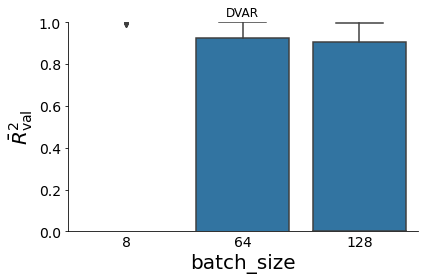

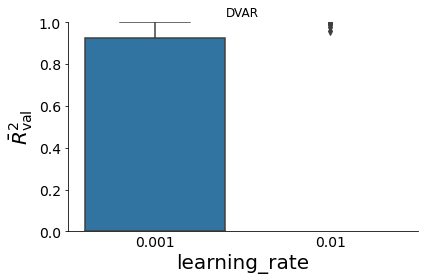

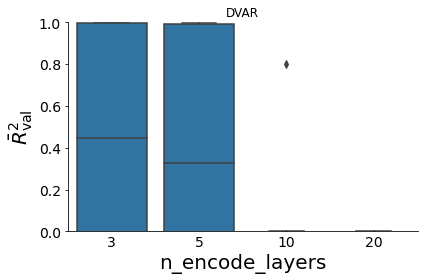

In [21]:
for param in to_plot.columns:
    if param == 'r2_adj_val_dvar1':
        continue
    if param == 'r2_adj_val_qoi1':
        continue

    fig, ax = plt.subplots()

    sns.boxplot(data=to_plot, x=param, y='r2_adj_val_dvar1', color=sns.color_palette()[0])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(y_lim)
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)
    #ax.grid(True, axis='y')
    ax.set_title("DVAR")
    fig.tight_layout()
    fig.savefig(f'{plot_dir}/dependence_on_{param}.jpg')

In [22]:
#g = sns.pairplot(data=df[config_columns + ['r2_adj_val']], hue='r2_adj_val', diag_kind='hist', corner=True)

In [23]:
len(config_columns)

6

In [24]:
len(config_column_labels)

6

In [25]:
to_plot = df[config_columns + ['r2_adj_val_qoi1']].copy()
to_plot['r2_adj_val_qoi1'], bins = pd.cut(df['r2_adj_val_qoi1'], 5, retbins=True)
mean_points = [(bins[i] + bins[i-1]) / 2. for i in range(1, len(bins))]
to_plot['r2_adj_val_qoi1'] = pd.cut(df['r2_adj_val_qoi1'], 5, retbins=False, labels=mean_points)

In [26]:
to_plot['r2_adj_val_qoi1']


/psi/home/boiger_r/.local/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0     0.866490
1     0.866490
2     0.866490
3     0.866490
4     0.866490
        ...   
91    0.078327
92    0.078327
93   -0.185051
94    0.078327
95    0.078327
Name: r2_adj_val_qoi1, Length: 96, dtype: category
Categories (5, float64): [-0.185051 < 0.078327 < 0.341048 < 0.603769 < 0.866490]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


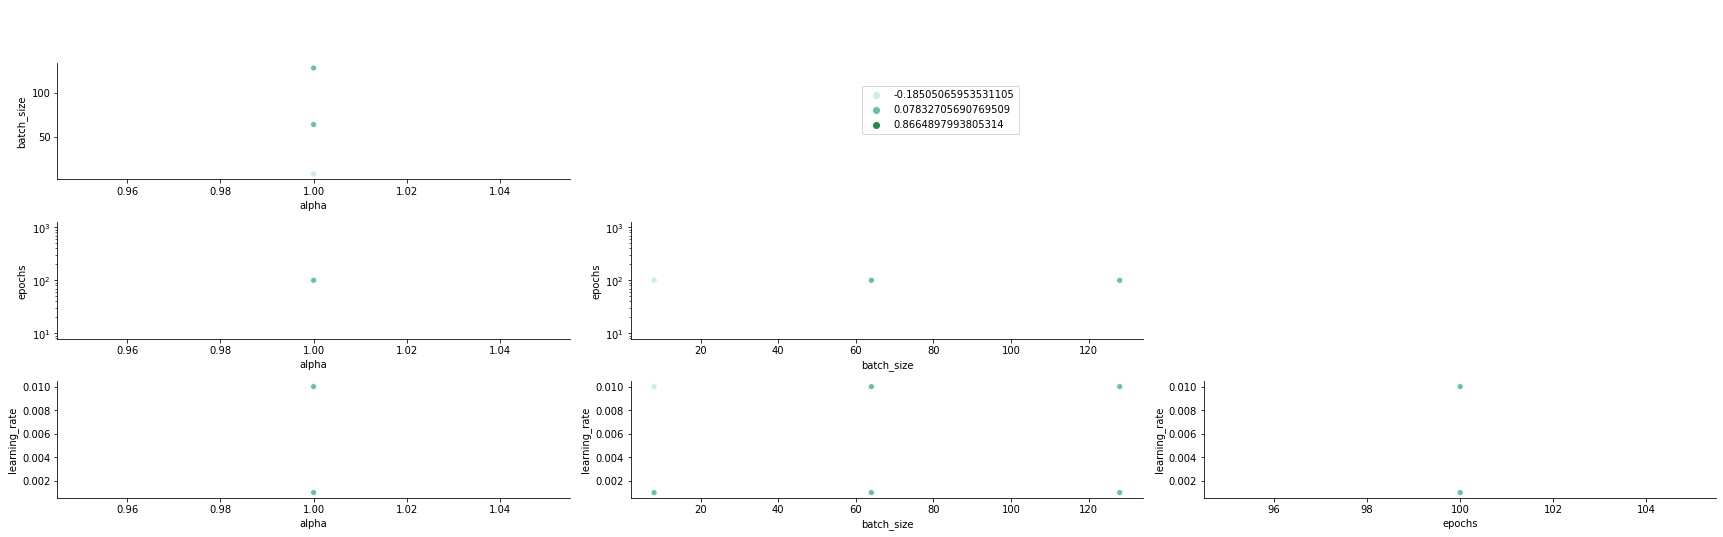

In [27]:
n_row = 4
n_col = 4
cols = config_columns

colors = sns.color_palette("BuGn_r", n_colors=len(to_plot['r2_adj_val_qoi1'].unique()))
colors.reverse()

fig, axes = plt.subplots(n_row, n_col, figsize=(32, 9))
legend = True

for i in range(n_row):
    for j in range(n_col):
        ax = axes[i, j]
        if j >= i:
            ax.remove()
            continue
        sns.scatterplot(data=to_plot,
                        x=cols[j],
                        y=cols[i],
                        hue=to_plot['r2_adj_val_qoi1'].tolist(),
                        palette=colors,
                        legend='brief' if legend else False,
                        ax=ax)
        if legend:
            legend = False

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel(config_column_labels[config_columns[j]])
        ax.set_ylabel(config_column_labels[config_columns[i]])
        ax.legend().remove()
fig.tight_layout()
fig.legend(loc=(0.5, 0.75))

axes[2, 0].set_yscale('log')
axes[2, 1].set_yscale('log')

# Best configs

In [28]:
df

MAE_train_dvar1  MAE_train_dvar2  MAE_train_qoi1  MAE_val_dvar1  \
0          0.007214         0.106618        0.004822       0.007203   
1          0.004328         0.142310        0.010249       0.004333   
2          0.013747         0.151381        0.012753       0.013767   
3          0.234760         0.234760        0.007712       0.235341   
4          0.009907         0.124363        0.007989       0.009932   
..              ...              ...             ...            ...   
91         0.234468         0.234468        0.099681       0.234951   
92         0.234409         0.234409        0.099219       0.234860   
93         0.236200         0.236200        0.102594       0.236582   
94         0.235488         0.235488        0.099146       0.235913   
95         0.234796         0.234796        0.099765       0.235240   

    MAE_val_dvar2  MAE_val_qoi1  MAPE_train_dvar1  MAPE_train_dvar2  \
0        0.110361      0.007912               inf               inf   
1        0.144456      0.011682               inf               inf   
2        0.153676      0.013880               inf               inf   
3        0.235341      0.010648               inf               inf   
4        0.126130      0.010804               inf               inf   
..            ...           ...               ...               ...   
91       0.234951      0.103195               inf               inf   
92       0.234860      0.102142               inf               inf   
93       0.236582      0.106525               inf               inf   
94       0.235913      0.102105               inf               inf   
95       0.235240      0.103335               inf               inf   

    MAPE_train_qoi1  MAPE_val_dvar1  ...  iterations_since_restore  \
0               inf             inf  ...                         1   
1               inf             inf  ...                         1   
2               inf             inf  ...                         1   
3               inf             inf  ...                         1   
4               inf             inf  ...                         1   
..              ...             ...  ...                       ...   
91              inf             inf  ...                         1   
92              inf             inf  ...                         1   
93              inf             inf  ...                         1   
94              inf             inf  ...                         1   
95              inf             inf  ...                         1   

       trial_id  config/alpha  config/batch_size  \
0   a90ca_00000             1                  8   
1   a90ca_00001             1                 64   
2   a90ca_00002             1                128   
3   a90ca_00003             1                  8   
4   a90ca_00004             1                 64   
..          ...           ...                ...   
91  a90ca_00091             1                 64   
92  a90ca_00092             1                128   
93  a90ca_00093             1                  8   
94  a90ca_00094             1                 64   
95  a90ca_00095             1                128   

                                      config/datafile  config/epochs  \
0   /data/user/boiger_r/aerosol/aerosol_data/raw_d...            100   
1   /data/user/boiger_r/aerosol/aerosol_data/raw_d...            100   
2   /data/user/boiger_r/aerosol/aerosol_data/raw_d...            100   
3   /data/user/boiger_r/aerosol/aerosol_data/raw_d...            100   
4   /data/user/boiger_r/aerosol/aerosol_data/raw_d...            100   
..                                                ...            ...   
91  /data/user/boiger_r/aerosol/aerosol_data/raw_d...            100   
92  /data/user/boiger_r/aerosol/aerosol_data/raw_d...            100   
93  /data/user/boiger_r/aerosol/aerosol_data/raw_d...            100   
94  /data/user/boiger_r/aerosol/aerosol_data/raw_d...            100   
95  /data/user/boiger_r/aerosol/aerosol_

In [34]:
best_config = df.sort_values('r2_val_dvar2', ascending=False).iloc[0, :]

In [30]:
df.keys()

Index(['MAE_train_dvar1', 'MAE_train_dvar2', 'MAE_train_qoi1', 'MAE_val_dvar1',
       'MAE_val_dvar2', 'MAE_val_qoi1', 'MAPE_train_dvar1', 'MAPE_train_dvar2',
       'MAPE_train_qoi1', 'MAPE_val_dvar1', 'MAPE_val_dvar2', 'MAPE_val_qoi1',
       'MSE_train_dvar1', 'MSE_train_dvar2', 'MSE_train_qoi1', 'MSE_val_dvar1',
       'MSE_val_dvar2', 'MSE_val_qoi1',
       'median_percentile_max_error_train_dvar1',
       'median_percentile_max_error_train_dvar2',
       'median_percentile_max_error_train_qoi1',
       'median_percentile_max_error_val_dvar1',
       'median_percentile_max_error_val_dvar2',
       'median_percentile_max_error_val_qoi1',
       '90_percentile_max_error_train_dvar1',
       '90_percentile_max_error_train_dvar2',
       '90_percentile_max_error_train_qoi1',
       '90_percentile_max_error_val_dvar1',
       '90_percentile_max_error_val_dvar2', '90_percentile_max_error_val_qoi1',
       'r2_train_dvar1', 'r2_train_dvar2', 'r2_train_qoi1', 'r2_val_dvar1',
       'r2_v

In [31]:
df.sort_values('r2_val_qoi1', ascending=False)[config_columns + ['r2_train_dvar1', 'r2_train_dvar2', 'r2_train_qoi1', 'r2_val_dvar1',
       'r2_val_dvar2', 'r2_val_qoi1', 'r2_adj_train_dvar1',
       'r2_adj_train_dvar2', 'r2_adj_train_qoi1', 'r2_adj_val_dvar1',
       'r2_adj_val_dvar2', 'r2_adj_val_qoi1']].rename(columns=config_column_labels).head(5)

alpha  batch_size  epochs  learning_rate  n_decode_layers  \
41      1         128     100          0.010               10   
21      1           8     100          0.010               20   
16      1          64     100          0.010               10   
22      1          64     100          0.010               20   
12      1           8     100          0.001               10   

    n_encode_layers  r2_train_dvar1  r2_train_dvar2  r2_train_qoi1  \
41                5       -0.010875       -0.010875       0.998517   
21                3       -0.018168       -0.018168       0.999074   
16                3       -0.007684       -0.007684       0.999724   
22                3       -0.004955       -0.004955       0.999590   
12                3       -0.001074       -0.001074       0.999869   

    r2_val_dvar1  r2_val_dvar2  r2_val_qoi1  r2_adj_train_dvar1  \
41     -0.010847     -0.010847     0.997872           -0.010954   
21     -0.019451     -0.019451     0.997624           -0.018248   
16     -0.008882     -0.008882     0.997149           -0.007762   
22     -0.005590     -0.005590     0.996947           -0.005034   
12     -0.001427     -0.001427     0.996923           -0.001152   

    r2_adj_train_dvar2  r2_adj_train_qoi1  r2_adj_val_dvar1  r2_adj_val_dvar2  \
41           -0.010954           0.998513         -0.011163         -0.011163   
21           -0.018248           0.999072         -0.019770         -0.019770   
16           -0.007762           0.999723         -0.009197         -0.009197   
22           -0.005034           0.999589         -0.005904         -0.005904   
12           -0.001152           0.999869         -0.001740         -0.001740   

    r2_adj_val_qoi1  
41         0.997850  
21         0.997600  
16         0.997120  
22         0.996916  
12         0.996892

In [32]:
df.sort_values('r2_val_dvar1', ascending=False)[config_columns + ['r2_val_dvar1','r2_adj_val_qoi1','r2_adj_train_qoi1', 'MAPE_val_qoi1', 'median_percentile_max_error_val_qoi1', '90_percentile_max_error_val_qoi1','r2_val_qoi1']].rename(columns=config_column_labels).head(5)

alpha  batch_size  epochs  learning_rate  n_decode_layers  \
1       1          64     100          0.001                3   
7       1          64     100          0.001                5   
24      1           8     100          0.001                3   
25      1          64     100          0.001                3   
30      1           8     100          0.001                5   

    n_encode_layers  r2_val_dvar1  r2_adj_val_qoi1  r2_adj_train_qoi1  \
1                 3      0.999611         0.985065           0.986649   
7                 3      0.999546         0.988341           0.990948   
24                5      0.999426         0.992901           0.996055   
25                5      0.999121         0.984858           0.988179   
30                5      0.999113         0.991906           0.995241   

    MAPE_val_qoi1  median_percentile_max_error_val_qoi1  \
1             inf                              6.380046   
7             inf                              5.656024   
24            inf                              4.941600   
25            inf                              6.280238   
30            inf                              4.613432   

    90_percentile_max_error_val_qoi1  r2_val_qoi1  
1                           9.757469     0.985215  
7                           8.900210     0.988458  
24                          7.831508     0.992972  
25                          9.183181     0.985010  
30                          7.337751     0.991987

In [33]:
df.sort_values('r2_val_dvar2', ascending=False)[config_columns + ['r2_val_dvar1','r2_adj_val_qoi1','r2_adj_train_qoi1', 'MAPE_val_qoi1', 'median_percentile_max_error_val_qoi1', '90_percentile_max_error_val_qoi1','r2_val_qoi1']].rename(columns=config_column_labels).head(5)

alpha  batch_size  epochs  learning_rate  n_decode_layers  \
0       1           8     100          0.001                3   
24      1           8     100          0.001                3   
6       1           8     100          0.001                5   
30      1           8     100          0.001                5   
4       1          64     100          0.010                3   

    n_encode_layers  r2_val_dvar1  r2_adj_val_qoi1  r2_adj_train_qoi1  \
0                 3      0.998637         0.992882           0.995843   
24                5      0.999426         0.992901           0.996055   
6                 3      0.998325         0.991985           0.995259   
30                5      0.999113         0.991906           0.995241   
4                 3      0.997958         0.985616           0.988974   

    MAPE_val_qoi1  median_percentile_max_error_val_qoi1  \
0             inf                              4.898771   
24            inf                              4.941600   
6             inf                              4.867311   
30            inf                              4.613432   
4             inf                              7.655998   

    90_percentile_max_error_val_qoi1  r2_val_qoi1  
0                           7.902148     0.992953  
24                          7.831508     0.992972  
6                           7.791630     0.992065  
30                          7.337751     0.991987  
4                          11.971336     0.985760

In [35]:
best_config.name

0

In [36]:
best_config['trial_id']

'a90ca_00000'

# Worst configs

In [129]:
df.sort_values('r2_adj_val_qoi1', ascending=True)[config_columns + ['r2_adj_val_qoi1', 'MAPE_val_qoi1', 'median_percentile_max_error_val_qoi1', '90_percentile_max_error_val_qoi1']].rename(columns=config_column_labels).head(5)

alpha  batch_size  epochs  learning_rate  n_decode_layers  \
57      1           8     100          0.010                5   
69      1           8     100          0.010               20   
78      1           8     100          0.001                5   
33      1           8     100          0.010                5   
72      1           8     100          0.001                3   

    n_encode_layers  r2_adj_val_qoi1  MAPE_val_qoi1  \
57               10        -0.315754            inf   
69               10        -0.169056            inf   
78               20        -0.091328            inf   
33                5        -0.088956            inf   
72               20        -0.073010            inf   

    median_percentile_max_error_val_qoi1  90_percentile_max_error_val_qoi1  
57                             21.533597                         52.507190  
69                             20.705809                         48.167482  
78                             19.874402                         34.545914  
33                             20.140368                         35.226653  
72                             19.815390                         34.497671

In [130]:
df

MAE_train_dvar1  MAE_train_dvar2  MAE_train_qoi1  MAE_val_dvar1  \
0          0.007214         0.106618        0.004822       0.007203   
1          0.004328         0.142310        0.010249       0.004333   
2          0.013747         0.151381        0.012753       0.013767   
3          0.234760         0.234760        0.007712       0.235341   
4          0.009907         0.124363        0.007989       0.009932   
..              ...              ...             ...            ...   
91         0.234468         0.234468        0.099681       0.234951   
92         0.234409         0.234409        0.099219       0.234860   
93         0.236200         0.236200        0.102594       0.236582   
94         0.235488         0.235488        0.099146       0.235913   
95         0.234796         0.234796        0.099765       0.235240   

    MAE_val_dvar2  MAE_val_qoi1  MAPE_train_dvar1  MAPE_train_dvar2  \
0        0.110361      0.007912               inf               inf   
1        0.144456      0.011682               inf               inf   
2        0.153676      0.013880               inf               inf   
3        0.235341      0.010648               inf               inf   
4        0.126130      0.010804               inf               inf   
..            ...           ...               ...               ...   
91       0.234951      0.103195               inf               inf   
92       0.234860      0.102142               inf               inf   
93       0.236582      0.106525               inf               inf   
94       0.235913      0.102105               inf               inf   
95       0.235240      0.103335               inf               inf   

    MAPE_train_qoi1  MAPE_val_dvar1  ...  iterations_since_restore  \
0               inf             inf  ...                         1   
1               inf             inf  ...                         1   
2               inf             inf  ...                         1   
3               inf             inf  ...                         1   
4               inf             inf  ...                         1   
..              ...             ...  ...                       ...   
91              inf             inf  ...                         1   
92              inf             inf  ...                         1   
93              inf             inf  ...                         1   
94              inf             inf  ...                         1   
95              inf             inf  ...                         1   

       trial_id  config/alpha  config/batch_size  \
0   a90ca_00000             1                  8   
1   a90ca_00001             1                 64   
2   a90ca_00002             1                128   
3   a90ca_00003             1                  8   
4   a90ca_00004             1                 64   
..          ...           ...                ...   
91  a90ca_00091             1                 64   
92  a90ca_00092             1                128   
93  a90ca_00093             1                  8   
94  a90ca_00094             1                 64   
95  a90ca_00095             1                128   

                                      config/datafile  config/epochs  \
0   /data/user/boiger_r/aerosol/aerosol_data/raw_d...            100   
1   /data/user/boiger_r/aerosol/aerosol_data/raw_d...            100   
2   /data/user/boiger_r/aerosol/aerosol_data/raw_d...            100   
3   /data/user/boiger_r/aerosol/aerosol_data/raw_d...            100   
4   /data/user/boiger_r/aerosol/aerosol_data/raw_d...            100   
..                                                ...            ...   
91  /data/user/boiger_r/aerosol/aerosol_data/raw_d...            100   
92  /data/user/boiger_r/aerosol/aerosol_data/raw_d...            100   
93  /data/user/boiger_r/aerosol/aerosol_data/raw_d...            100   
94  /data/user/boiger_r/aerosol/aerosol_data/raw_d...            100   
95  /data/user/boiger_r/aerosol/aerosol_

# Copy the best model to the models directory

In [37]:
best_model_dir = f'{best_config["logdir"]}'

In [38]:
best_model_dir

'/data/user/boiger_r/aerosol/aerosol_results/simulated_data/autoencoder1/train_autoencoder_2021-04-09_23-00-48/train_autoencoder_a90ca_00000_0_alpha=1,batch_size=8,epochs=100,learning_rate=0.001,n_decode_layers=3,n_encode_layers=3_2021-04-09_23-00-48'

In [39]:
model_dir

'/data/user/boiger_r/aerosol/aerosol_results/simulated_data/autoencoder_models/autoencoder1'

In [40]:
model_dir_save = model_dir +'_dvar2'
model_dir_save

'/data/user/boiger_r/aerosol/aerosol_results/simulated_data/autoencoder_models/autoencoder1_dvar2'

In [41]:
shutil.copytree(best_model_dir, f'{model_dir_save}')

'/data/user/boiger_r/aerosol/aerosol_results/simulated_data/autoencoder_models/autoencoder1_dvar2'

# Closer look w. r. t. overfitting

In [42]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_adj_train_qoi1', y='r2_adj_val_qoi1', ax=ax)
ax.plot([0., 1.], [0., 1.], color='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0.995, 1.001])
ax.set_ylim([0.995, 1.001])

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

In [43]:
df[df['r2_adj_train_qoi1'] > 0.95]

MAE_train_dvar1  MAE_train_dvar2  MAE_train_qoi1  MAE_val_dvar1  \
0          0.007214         0.106618        0.004822       0.007203   
1          0.004328         0.142310        0.010249       0.004333   
2          0.013747         0.151381        0.012753       0.013767   
3          0.234760         0.234760        0.007712       0.235341   
4          0.009907         0.124363        0.007989       0.009932   
5          0.010282         0.130408        0.009226       0.010304   
6          0.009228         0.110195        0.005453       0.009236   
7          0.004873         0.122593        0.008257       0.004885   
8          0.012851         0.138476        0.012014       0.012871   
9          0.235063         0.235063        0.001287       0.235665   
10         0.012534         0.123616        0.007468       0.012575   
11         0.032275         0.129256        0.010891       0.032284   
12         0.234327         0.234327        0.000870       0.234822   
13         0.062975         0.205229        0.016512       0.063597   
14         0.062679         0.188804        0.017327       0.063446   
15         0.235213         0.235213        0.004540       0.235913   
16         0.234762         0.234762        0.001480       0.235402   
17         0.234644         0.234644        0.007928       0.235307   
18         0.235217         0.235217        0.001407       0.235681   
19         0.234545         0.234545        0.001376       0.235004   
20         0.234664         0.234664        0.001980       0.235091   
21         0.235590         0.235590        0.003251       0.236265   
22         0.234911         0.234911        0.001653       0.235489   
23         0.234843         0.234843        0.006186       0.235309   
24         0.005093         0.108326        0.004847       0.005087   
25         0.006417         0.144269        0.009387       0.006412   
26         0.007581         0.156989        0.015221       0.007600   
27         0.235691         0.235691        0.016760       0.236090   
28         0.019910         0.134687        0.009217       0.019930   
29         0.017814         0.133924        0.012292       0.017872   
30         0.006292         0.112231        0.005543       0.006296   
31         0.012787         0.127407        0.009490       0.012810   
32         0.014161         0.185952        0.016635       0.014247   
34         0.018610         0.135972        0.011687       0.018642   
36         0.234769         0.234769        0.001780       0.235218   
39         0.236530         0.236530        0.015186       0.236900   
40         0.234827         0.234827        0.002056       0.235283   
41         0.235204         0.235204        0.004343       0.235688   
42         0.234874         0.234874        0.002335       0.235317   
43         0.234479         0.234479        0.002173       0.234929   
44         0.234484         0.234484        0.003728       0.234947   
46         0.236988         0.236988        0.002469       0.237247   
47         0.234489         0.234489        0.002149       0.234986   
62         0.234475         0.234475        0.005237       0.234921   
68         0.234730         0.234730        0.004365       0.235140   

    MAE_val_dvar2  MAE_val_qoi1  MAPE_train_dvar1  MAPE_train_dvar2  \
0        0.110361      0.007912               inf               inf   
1        0.144456      0.011682               inf               inf   
2        0.153676      0.013880               inf               inf   
3        0.235341      0.010648               inf               inf   
4        0.126130      0.010804               inf               inf   
5        0.132963      0.011297               inf               inf   
6        0.114142      0.008439               inf               inf   
7        0.125858      0.010266               inf               inf   
8        0.141682      0.013839               inf               inf   
9        0.235665      0.00

In [44]:
# LOad history of best config

In [45]:
best_model_folder = best_config['trial_id']

In [46]:
result_dir

'/data/user/boiger_r/aerosol/aerosol_results/simulated_data/autoencoder1'

In [47]:
best_model_hist = pd.read_csv(f'{result_dir}/histories/{best_model_folder}.csv', index_col=0)

In [48]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAE_train_qoi1'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val_qoi1'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()


In [56]:
best_model_hist

MAE_train_dvar1  MAE_train_dvar2  MAE_train_qoi1  MAE_val_dvar1  \
0         0.007214         0.106618        0.004822       0.007203   

   MAE_val_dvar2  MAE_val_qoi1  MAPE_train_dvar1  MAPE_train_dvar2  \
0       0.110361      0.007912               inf               inf   

   MAPE_train_qoi1  MAPE_val_dvar1  ...                 date   timestamp  \
0              inf             inf  ...  2021-04-10_02-13-43  1618013623   

   time_total_s    pid             hostname         node_ip  \
0  11568.912647  35061  merlin-c-217.psi.ch  129.129.185.97   

   time_since_restore  timesteps_since_restore  iterations_since_restore  \
0        11568.912647                        0                         1   

      trial_id  
0  a90ca_00000  

[1 rows x 58 columns]

In [49]:
best_model_hist.keys()

Index(['MAE_train_dvar1', 'MAE_train_dvar2', 'MAE_train_qoi1', 'MAE_val_dvar1',
       'MAE_val_dvar2', 'MAE_val_qoi1', 'MAPE_train_dvar1', 'MAPE_train_dvar2',
       'MAPE_train_qoi1', 'MAPE_val_dvar1', 'MAPE_val_dvar2', 'MAPE_val_qoi1',
       'MSE_train_dvar1', 'MSE_train_dvar2', 'MSE_train_qoi1', 'MSE_val_dvar1',
       'MSE_val_dvar2', 'MSE_val_qoi1',
       'median_percentile_max_error_train_dvar1',
       'median_percentile_max_error_train_dvar2',
       'median_percentile_max_error_train_qoi1',
       'median_percentile_max_error_val_dvar1',
       'median_percentile_max_error_val_dvar2',
       'median_percentile_max_error_val_qoi1',
       '90_percentile_max_error_train_dvar1',
       '90_percentile_max_error_train_dvar2',
       '90_percentile_max_error_train_qoi1',
       '90_percentile_max_error_val_dvar1',
       '90_percentile_max_error_val_dvar2', '90_percentile_max_error_val_qoi1',
       'r2_train_dvar1', 'r2_train_dvar2', 'r2_train_qoi1', 'r2_val_dvar1',
       'r2_v

In [50]:
best_model_hist['r2_train_dvar1']

0    0.998619
Name: r2_train_dvar1, dtype: float64

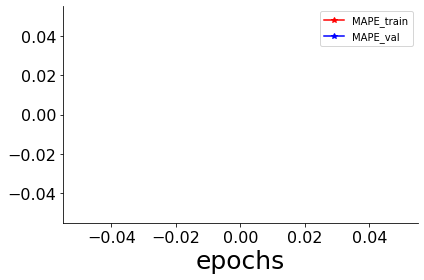

In [51]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAPE_train_qoi1'],'r*-', label = 'MAPE_train')
ax.plot(best_model_hist['MAPE_val_qoi1'],'b*-',label =  'MAPE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

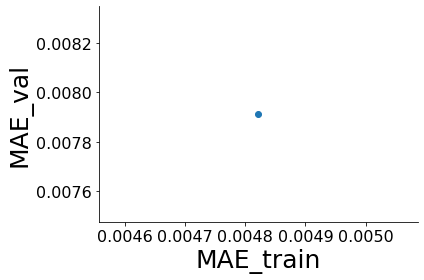

In [52]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['MAE_train_qoi1'],best_model_hist['MAE_val_qoi1'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('MAE_train', fontsize=25)
ax.set_ylabel('MAE_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

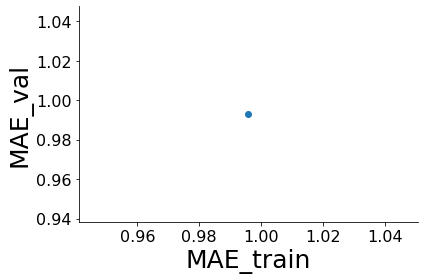

In [53]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['r2_train_qoi1'],best_model_hist['r2_val_qoi1'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('MAE_train', fontsize=25)
ax.set_ylabel('MAE_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

In [54]:
to_plot

config/alpha  config/batch_size  config/epochs  config/learning_rate  \
0              1                  8            100                 0.001   
1              1                 64            100                 0.001   
2              1                128            100                 0.001   
3              1                  8            100                 0.010   
4              1                 64            100                 0.010   
..           ...                ...            ...                   ...   
91             1                 64            100                 0.001   
92             1                128            100                 0.001   
93             1                  8            100                 0.010   
94             1                 64            100                 0.010   
95             1                128            100                 0.010   

    config/n_decode_layers  config/n_encode_layers r2_adj_val_qoi1  
0                        3                       3        0.866490  
1                        3                       3        0.866490  
2                        3                       3        0.866490  
3                        3                       3        0.866490  
4                        3                       3        0.866490  
..                     ...                     ...             ...  
91                      20                      20        0.078327  
92                      20                      20        0.078327  
93                      20                      20       -0.185051  
94                      20                      20        0.078327  
95                      20                      20        0.078327  

[96 rows x 7 columns]

In [55]:
to_plot_ow.columns

Index(['alpha', 'batch_size', 'epochs', 'learning_rate', 'n_decode_layers',
       'n_encode_layers', 'r2_adj_val_dvar1', 'r2_adj_val_qoi1'],
      dtype='object')

In [98]:
best_config

MAE_train_dvar1                                                    0.007214
MAE_train_dvar2                                                    0.106618
MAE_train_qoi1                                                     0.004822
MAE_val_dvar1                                                      0.007203
MAE_val_dvar2                                                      0.110361
                                                ...                        
config/epochs                                                           100
config/learning_rate                                                  0.001
config/n_decode_layers                                                    3
config/n_encode_layers                                                    3
logdir                    /data/user/boiger_r/aerosol/aerosol_results/si...
Name: 0, Length: 66, dtype: object

# create overview plot

In [99]:
best_config

MAE_train_dvar1                                                    0.007214
MAE_train_dvar2                                                    0.106618
MAE_train_qoi1                                                     0.004822
MAE_val_dvar1                                                      0.007203
MAE_val_dvar2                                                      0.110361
                                                ...                        
config/epochs                                                           100
config/learning_rate                                                  0.001
config/n_decode_layers                                                    3
config/n_encode_layers                                                    3
logdir                    /data/user/boiger_r/aerosol/aerosol_results/si...
Name: 0, Length: 66, dtype: object

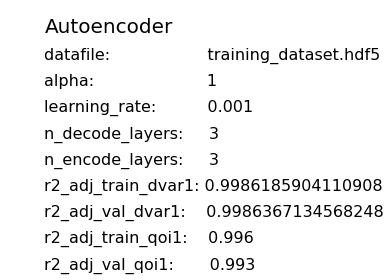

In [100]:
fig, ax = plt.subplots()

ax.annotate(xy=(1, 1),xytext=(0.1, 0.9),text='Autoencoder',fontsize=20)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.8),text='datafile:                   '+os.path.basename(best_config['config/datafile']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.7),text='alpha:                      '+str(best_config['config/alpha']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.6),text='learning_rate:          '+str(best_config['config/learning_rate']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.5),text='n_decode_layers:     '+str(best_config['config/n_decode_layers']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.4),text='n_encode_layers:     '+str(best_config['config/n_encode_layers']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.3),text='r2_adj_train_dvar1: '+str(best_config['r2_adj_train_dvar1']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.2),text='r2_adj_val_dvar1:    '+str(best_config['r2_adj_val_dvar1']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.1),text='r2_adj_train_qoi1:    '+str(np.round(best_config['r2_adj_train_qoi1'],3)),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.0),text='r2_adj_val_qoi1:       '+str(np.round(best_config['r2_adj_val_qoi1'],3)),fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
fig.tight_layout()
fig.savefig(f'{plot_dir}/forward_model_description.jpg',bbox_inches='tight')

1 0
1 1
1 2
2 0


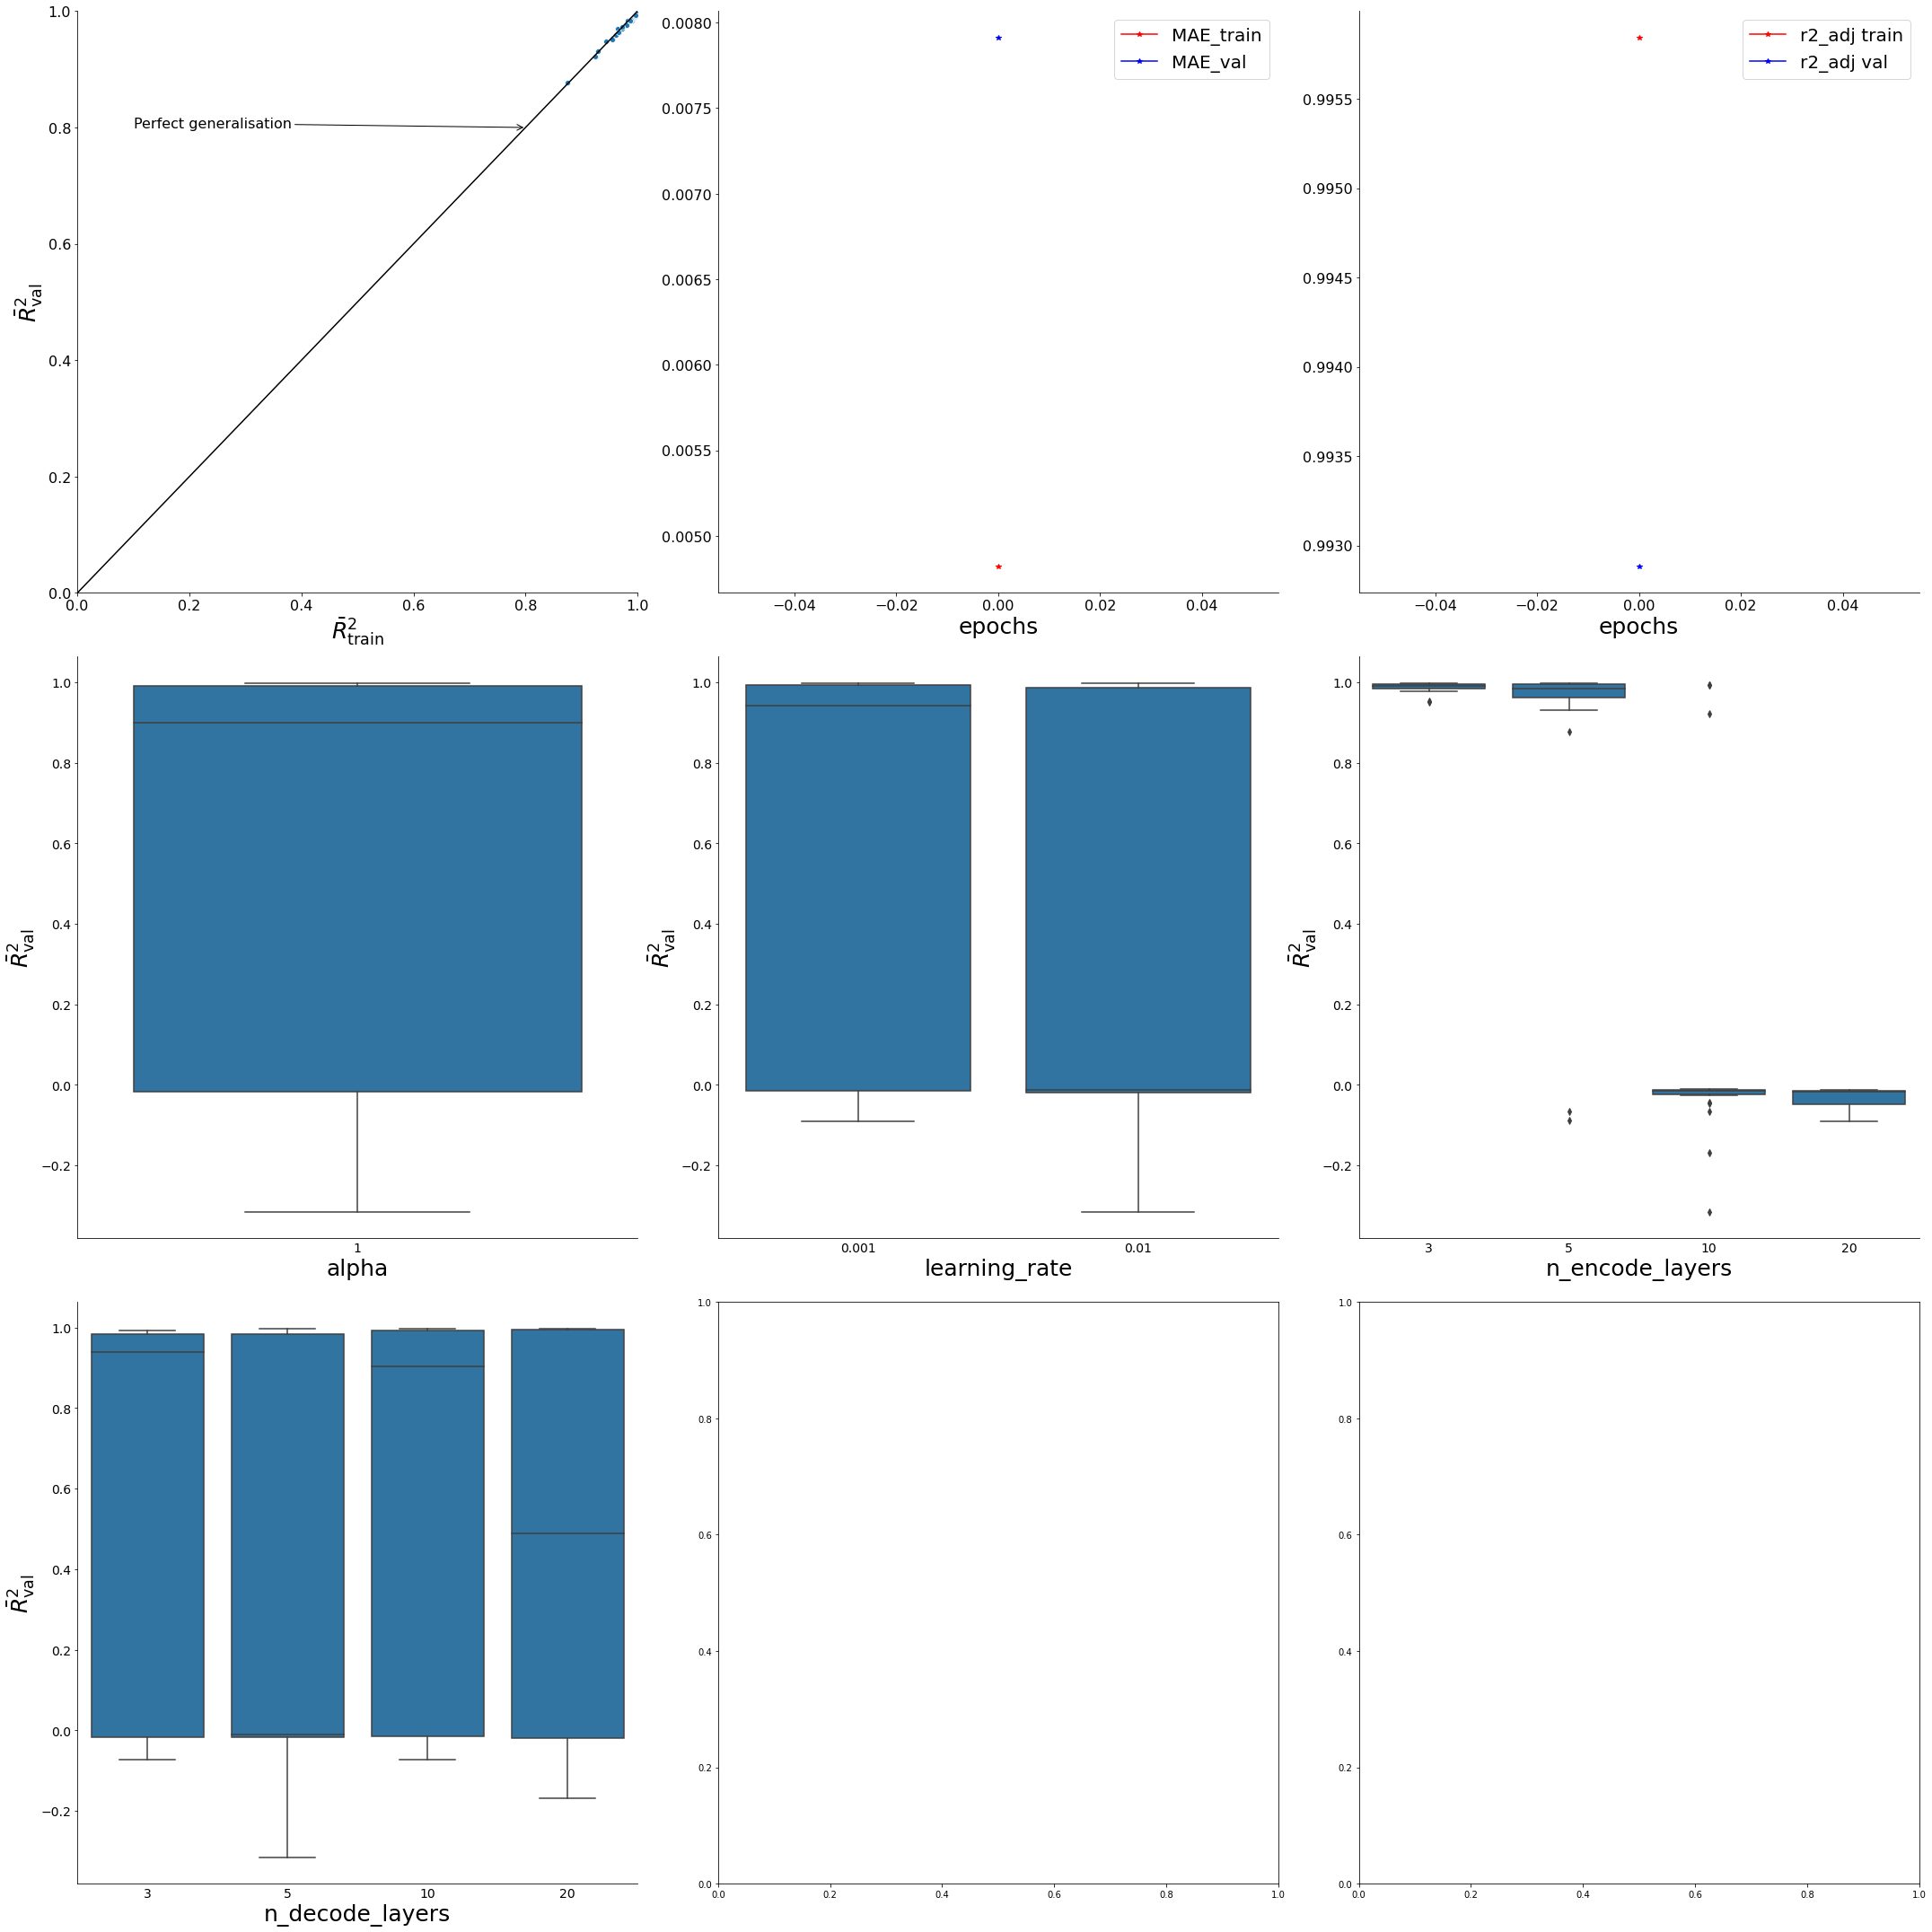

In [101]:
fig, axes = plt.subplots(3, 3, figsize=(30, 30))

ax= axes[0,0]
sns.scatterplot(data=df, x='r2_adj_train_qoi1', y='r2_adj_val_qoi1', ax=ax)
ax.plot([-1.5, 1.], [-1.5, 1.], color='black')
ax.annotate(xy=(0.8, 0.8),
            xytext=(0.1, 0.8),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0, 1.])
ax.set_ylim([0, 1.])


ax = axes[0,1]
ax.plot(best_model_hist['MAE_train_qoi1'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val_qoi1'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend(fontsize = 20)

ax = axes[0,2]

ax.plot(best_model_hist['r2_adj_train_qoi1'],'r*-', label = 'r2_adj train')
ax.plot(best_model_hist['r2_adj_val_qoi1'],'b*-',label =  'r2_adj val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend(fontsize = 20)


axeslist= [[1,0],[1,1],[1,2],[2,0],[2,1]]
i = 0

plot_columns_list = ['alpha', 'learning_rate', 'n_encode_layers', 'n_decode_layers']

for param in plot_columns_list:
    if param == 'r2_adj_val_qoi1':
        continue
    ax = axes[axeslist[i][0],axeslist[i][1]]
    print(axeslist[i][0],axeslist[i][1])
    i = i+1
    sns.boxplot(x=param, y='r2_adj_val_qoi1',data=to_plot_ow, color=sns.color_palette()[0],ax=ax)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
 #   ax.set_ylim([0,1])
    ax.set_xlabel(ax.get_xlabel(), fontsize=25)
#    ax.set_xlabel(fontsize =25)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)



#ax = axes[2,2]

#sns.boxplot(data=df, x='config/batch_size', y='time_since_restore', color=sns.color_palette()[0],ax=ax)

#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

fig.tight_layout()


fig.savefig(f'{plot_dir}/hyperparameter_scan_overview.jpg',bbox_inches='tight')